# **DATA DESCRIPTION**

- **Monthly balance** snapshots of **previous credit cards** that the applicant has with Home Credit.
- This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credit cards * # of months where we have some history observable for the previous credit card) rows.

# **LOAD DATA, PACKAGES AND MODULES**

In [48]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

In [49]:
credit_card_balance = pd.read_csv('../input/home-credit-default-risk/credit_card_balance.csv')

# **A FIRST SIGHT TO DATA**

In [8]:
# COLUMN DESCRIPTION
col_description = pd.read_csv('../input/home-credit-default-risk/HomeCredit_columns_description.csv', encoding='latin')
pd.set_option('display.max_info_rows', None)
pd.set_option('display.max_colwidth', None)
col_description[col_description['Table'] == 'credit_card_balance.csv'][['Row', 'Description']]

,Row,Description
150,SK_ID_PREV,"ID of previous credit in Home credit related to loan in our sample. (One loan in our sample can have 0,1,2 or more previous loans in Home Credit)"
151,SK_ID_CURR,ID of loan in our sample
152,MONTHS_BALANCE,Month of balance relative to application date (-1 means the freshest balance date)
153,AMT_BALANCE,Balance during the month of previous credit
154,AMT_CREDIT_LIMIT_ACTUAL,Credit card limit during the month of the previous credit
155,AMT_DRAWINGS_ATM_CURRENT,Amount drawing at ATM during the month of the previous credit
156,AMT_DRAWINGS_CURRENT,Amount drawing during the month of the previous credit
157,AMT_DRAWINGS_OTHER_CURRENT,Amount of other drawings during the month of the previous credit
158,AMT_DRAWINGS_POS_CURRENT,Amount drawing or buying goods during the month of the previous credit
159,AMT_INST_MIN_REGULARITY,Minimal installment for this month of the previous credit


In [9]:
credit_card_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [106]:
# SIZE OF DATA
credit_card_balance.shape

(3840312, 23)

In [105]:
# DATATYPE OF EACH COLUMN
credit_card_balance.dtypes

SK_ID_PREV                      int64
SK_ID_CURR                      int64
MONTHS_BALANCE                  int64
AMT_BALANCE                   float64
AMT_CREDIT_LIMIT_ACTUAL         int64
AMT_DRAWINGS_ATM_CURRENT      float64
AMT_DRAWINGS_CURRENT          float64
AMT_DRAWINGS_OTHER_CURRENT    float64
AMT_DRAWINGS_POS_CURRENT      float64
AMT_INST_MIN_REGULARITY       float64
AMT_PAYMENT_CURRENT           float64
AMT_PAYMENT_TOTAL_CURRENT     float64
AMT_RECEIVABLE_PRINCIPAL      float64
AMT_RECIVABLE                 float64
AMT_TOTAL_RECEIVABLE          float64
CNT_DRAWINGS_ATM_CURRENT      float64
CNT_DRAWINGS_CURRENT            int64
CNT_DRAWINGS_OTHER_CURRENT    float64
CNT_DRAWINGS_POS_CURRENT      float64
CNT_INSTALMENT_MATURE_CUM     float64
NAME_CONTRACT_STATUS           object
SK_DPD                          int64
SK_DPD_DEF                      int64
dtype: object

In [104]:
# CONTRACT STATUS
credit_card_balance['NAME_CONTRACT_STATUS'].unique()

array(['Active', 'Completed', 'Demand', 'Signed', 'Sent proposal',
       'Refused', 'Approved'], dtype=object)

In [103]:
# NUMBER OF NULL VALUES
credit_card_balance.isnull().sum().sort_values(ascending=False)

AMT_PAYMENT_CURRENT           767988
AMT_DRAWINGS_ATM_CURRENT      749816
CNT_DRAWINGS_POS_CURRENT      749816
AMT_DRAWINGS_OTHER_CURRENT    749816
AMT_DRAWINGS_POS_CURRENT      749816
CNT_DRAWINGS_OTHER_CURRENT    749816
CNT_DRAWINGS_ATM_CURRENT      749816
CNT_INSTALMENT_MATURE_CUM     305236
AMT_INST_MIN_REGULARITY       305236
SK_ID_PREV                         0
AMT_TOTAL_RECEIVABLE               0
SK_DPD                             0
NAME_CONTRACT_STATUS               0
CNT_DRAWINGS_CURRENT               0
AMT_PAYMENT_TOTAL_CURRENT          0
AMT_RECIVABLE                      0
AMT_RECEIVABLE_PRINCIPAL           0
SK_ID_CURR                         0
AMT_DRAWINGS_CURRENT               0
AMT_CREDIT_LIMIT_ACTUAL            0
AMT_BALANCE                        0
MONTHS_BALANCE                     0
SK_DPD_DEF                         0
dtype: int64

In [14]:
# PERCENTAGE OF NULL VALUES
(credit_card_balance.isnull().sum() / credit_card_balance.shape[0]).sort_values(ascending=False)

AMT_PAYMENT_CURRENT           0.199981
AMT_DRAWINGS_ATM_CURRENT      0.195249
CNT_DRAWINGS_POS_CURRENT      0.195249
AMT_DRAWINGS_OTHER_CURRENT    0.195249
AMT_DRAWINGS_POS_CURRENT      0.195249
CNT_DRAWINGS_OTHER_CURRENT    0.195249
CNT_DRAWINGS_ATM_CURRENT      0.195249
CNT_INSTALMENT_MATURE_CUM     0.079482
AMT_INST_MIN_REGULARITY       0.079482
SK_ID_PREV                    0.000000
AMT_TOTAL_RECEIVABLE          0.000000
SK_DPD                        0.000000
NAME_CONTRACT_STATUS          0.000000
CNT_DRAWINGS_CURRENT          0.000000
AMT_PAYMENT_TOTAL_CURRENT     0.000000
AMT_RECIVABLE                 0.000000
AMT_RECEIVABLE_PRINCIPAL      0.000000
SK_ID_CURR                    0.000000
AMT_DRAWINGS_CURRENT          0.000000
AMT_CREDIT_LIMIT_ACTUAL       0.000000
AMT_BALANCE                   0.000000
MONTHS_BALANCE                0.000000
SK_DPD_DEF                    0.000000
dtype: float64

# **SUMMARIZATION**

In [102]:
credit_card_balance.describe()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,SK_DPD,SK_DPD_DEF
count,3.840312e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.090496e+06,3.840312e+06,3.090496e+06,3.090496e+06,3.535076e+06,...,3.840312e+06,3.840312e+06,3.840312e+06,3.090496e+06,3.840312e+06,3.090496e+06,3.090496e+06,3.535076e+06,3.840312e+06,3.840312e+06
mean,1.904504e+06,2.783242e+05,-3.452192e+01,5.830016e+04,1.538080e+05,5.961325e+03,7.433388e+03,2.881696e+02,2.968805e+03,3.540204e+03,...,5.596588e+04,5.808881e+04,5.809829e+04,3.094490e-01,7.031439e-01,4.812496e-03,5.594791e-01,2.082508e+01,9.283667e+00,3.316220e-01
std,5.364695e+05,1.027045e+05,2.666775e+01,1.063070e+05,1.651457e+05,2.822569e+04,3.384608e+04,8.201989e+03,2.079689e+04,5.600154e+03,...,1.025336e+05,1.059654e+05,1.059718e+05,1.100401e+00,3.190347e+00,8.263861e-02,3.240649e+00,2.005149e+01,9.751570e+01,2.147923e+01
min,1.000018e+06,1.000060e+05,-9.600000e+01,-4.202502e+05,0.000000e+00,-6.827310e+03,-6.211620e+03,0.000000e+00,0.000000e+00,0.000000e+00,...,-4.233058e+05,-4.202502e+05,-4.202502e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.434385e+06,1.895170e+05,-5.500000e+01,0.000000e+00,4.500000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00
50%,1.897122e+06,2.783960e+05,-2.800000e+01,0.000000e+00,1.125000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.500000e+01,0.000000e+00,0.000000e+00
75%,2.369328e+06,3.675800e+05,-1.100000e+01,8.904669e+04,1.800000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.633911e+03,...,8.535924e+04,8.889949e+04,8.891451e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.200000e+01,0.000000e+00,0.000000e+00
max,2.843496e+06,4.562500e+05,-1.000000e+00,1.505902e+06,1.350000e+06,2.115000e+06,2.287098e+06,1.529847e+06,2.239274e+06,2.028820e+05,...,1.472317e+06,1.493338e+06,1.493338e+06,5.100000e+01,1.650000e+02,1.200000e+01,1.650000e+02,1.200000e+02,3.260000e+03,3.260000e+03


# **HISTOGRAM**

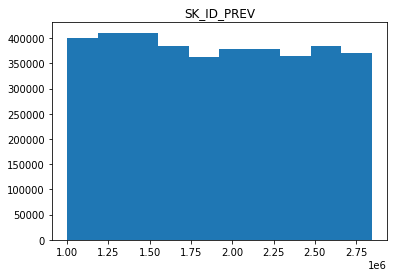

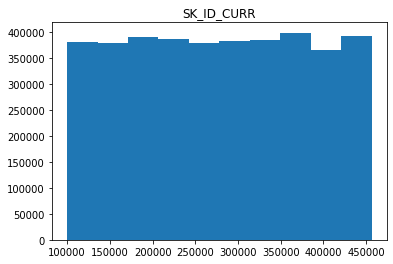

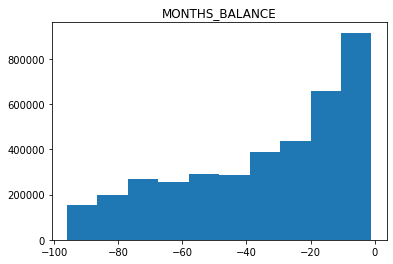

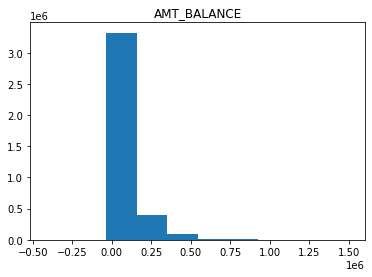

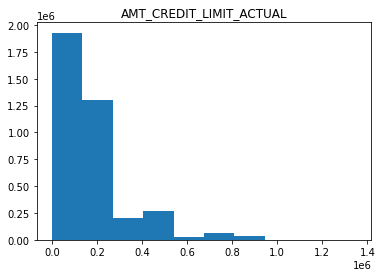

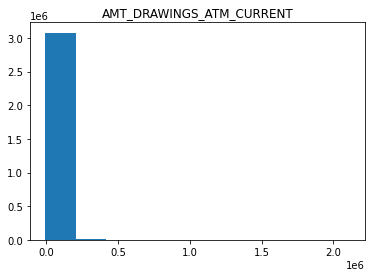

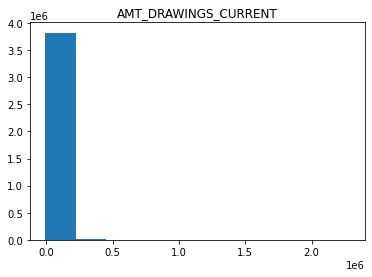

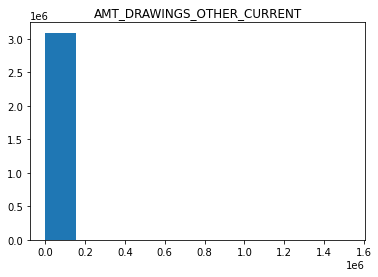

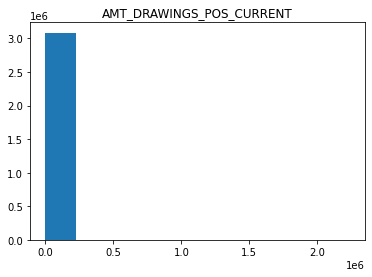

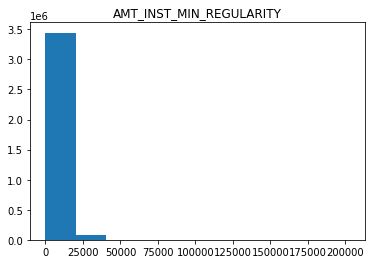

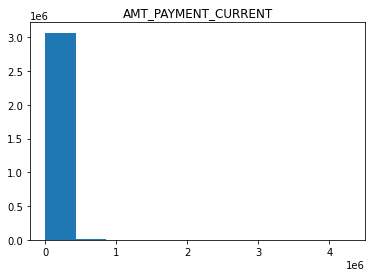

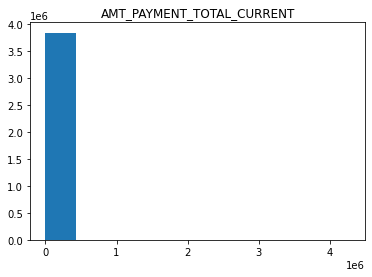

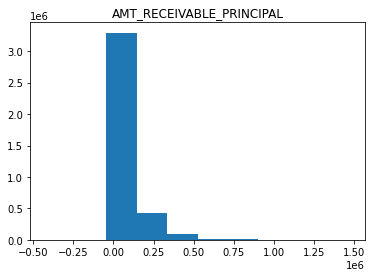

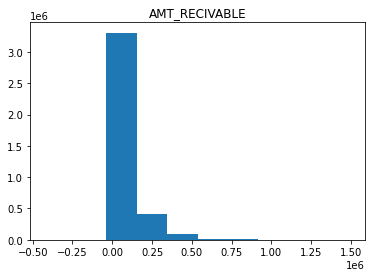

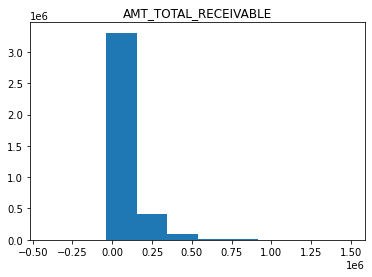

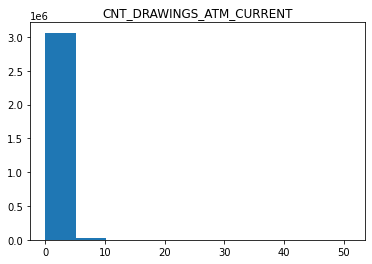

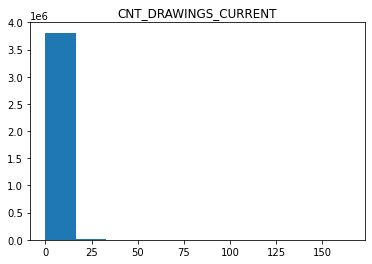

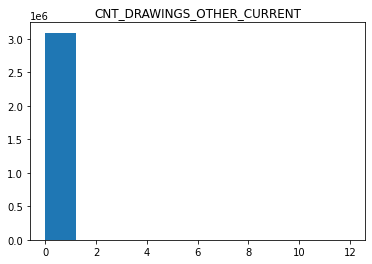

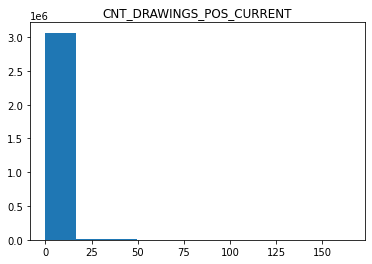

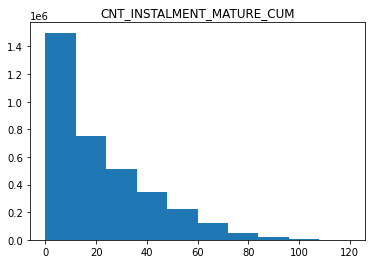

In [41]:
for i in range(20):
    plt.hist(credit_card_balance.iloc[:,i])
    plt.title('{}'.format(credit_card_balance.columns[i]))
    plt.show()

# **CORRELATION**

In [57]:
cor_matrix = credit_card_balance.corr()
cor_matrix

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,SK_DPD,SK_DPD_DEF
SK_ID_PREV,1.000000,0.004723,0.003670,0.005046,0.006631,0.004342,0.002624,-0.000160,0.001721,0.006460,...,0.005140,0.005035,0.005032,0.002821,0.000367,-0.001412,0.000809,-0.007219,-0.001786,0.001973
SK_ID_CURR,0.004723,1.000000,0.001696,0.003510,0.005991,0.000814,0.000708,0.000958,-0.000786,0.003300,...,0.003589,0.003518,0.003524,0.002082,0.002654,-0.000131,0.002135,-0.000581,-0.000962,0.001519
MONTHS_BALANCE,0.003670,0.001696,1.000000,0.014558,0.199900,0.036802,0.065527,0.000405,0.118146,-0.087529,...,0.016266,0.013172,0.013084,0.002536,0.113321,-0.026192,0.160207,-0.008620,0.039434,0.001659
AMT_BALANCE,0.005046,0.003510,0.014558,1.000000,0.489386,0.283551,0.336965,0.065366,0.169449,0.896728,...,0.999720,0.999917,0.999897,0.309968,0.259184,0.046563,0.155553,0.005009,-0.046988,0.013009
AMT_CREDIT_LIMIT_ACTUAL,0.006631,0.005991,0.199900,0.489386,1.000000,0.247219,0.263093,0.050579,0.234976,0.467620,...,0.490445,0.488641,0.488598,0.221808,0.204237,0.030051,0.202868,-0.157269,-0.038791,-0.002236
AMT_DRAWINGS_ATM_CURRENT,0.004342,0.000814,0.036802,0.283551,0.247219,1.000000,0.800190,0.017899,0.078971,0.094824,...,0.280402,0.278290,0.278260,0.732907,0.298173,0.013254,0.076083,-0.103721,-0.022044,-0.003360
AMT_DRAWINGS_CURRENT,0.002624,0.000708,0.065527,0.336965,0.263093,0.800190,1.000000,0.236297,0.615591,0.124469,...,0.337117,0.332831,0.332796,0.594361,0.523016,0.140032,0.359001,-0.093491,-0.020606,-0.003137
AMT_DRAWINGS_OTHER_CURRENT,-0.000160,0.000958,0.000405,0.065366,0.050579,0.017899,0.236297,1.000000,0.007382,0.002158,...,0.066108,0.064929,0.064923,0.012008,0.021271,0.575295,0.004458,-0.023013,-0.003693,-0.000568
AMT_DRAWINGS_POS_CURRENT,0.001721,-0.000786,0.118146,0.169449,0.234976,0.078971,0.615591,0.007382,1.000000,0.063562,...,0.173745,0.168974,0.168950,0.072658,0.520123,0.007620,0.542556,-0.106813,-0.015040,-0.002384
AMT_INST_MIN_REGULARITY,0.006460,0.003300,-0.087529,0.896728,0.467620,0.094824,0.124469,0.002158,0.063562,1.000000,...,0.896030,0.897617,0.897587,0.170616,0.148262,0.014360,0.086729,0.064320,-0.061484,-0.005715


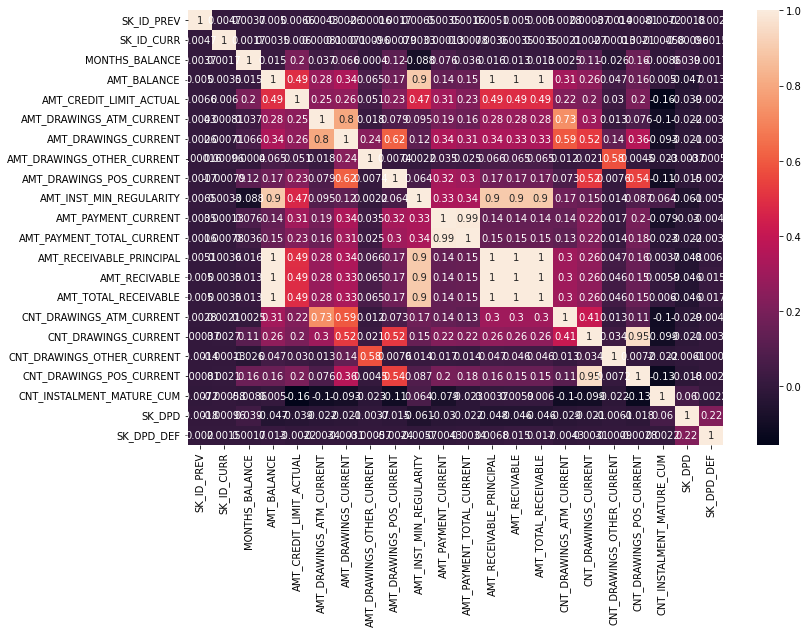

In [56]:
plt.figure(figsize=(12,8))
sns.heatmap(credit_card_balance.corr(), annot=True)

plt.show()


# **EDA COMPLETED => CLEANING**

**DROP FEATURE**

 **- Drop high correlated features**
 
 **- Drop feature that can be represented by other feature (which do not include high percentage of null values)**
 
 **- Drop unimportant features for analysis purpose**

In [87]:
# FIND HIGH CORRELATED COLUMNS 

# Correlation matrix will be mirror image about the diagonal and all the 
# diagonal elements will be 1. So we choose between upper or lower triangular Correlation matrix
upper_triangular = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))

to_drop = []
for column in upper_triangular.columns:
    for index in upper_triangular.index:
        if abs(upper_triangular.loc[index, column]) >= 0.9:
            to_drop.append((index,column))
print('Features that have high correlation to each other (>0.9) ')
to_drop

Features that have high correlation to each other (>0.9) 


[('AMT_PAYMENT_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT'),
 ('AMT_BALANCE', 'AMT_RECEIVABLE_PRINCIPAL'),
 ('AMT_BALANCE', 'AMT_RECIVABLE'),
 ('AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE'),
 ('AMT_BALANCE', 'AMT_TOTAL_RECEIVABLE'),
 ('AMT_RECEIVABLE_PRINCIPAL', 'AMT_TOTAL_RECEIVABLE'),
 ('AMT_RECIVABLE', 'AMT_TOTAL_RECEIVABLE'),
 ('CNT_DRAWINGS_CURRENT', 'CNT_DRAWINGS_POS_CURRENT')]

**Now we need to choose one feature in each high correlated pair to drop. 
Note that I will have a look again at column description, data, and null percentage of each column to decide which features to be dropped**

In [79]:
col_description[col_description['Table'] == 'credit_card_balance.csv'][['Row', 'Description']]

,Row,Description
150,SK_ID_PREV,"ID of previous credit in Home credit related to loan in our sample. (One loan in our sample can have 0,1,2 or more previous loans in Home Credit)"
151,SK_ID_CURR,ID of loan in our sample
152,MONTHS_BALANCE,Month of balance relative to application date (-1 means the freshest balance date)
153,AMT_BALANCE,Balance during the month of previous credit
154,AMT_CREDIT_LIMIT_ACTUAL,Credit card limit during the month of the previous credit
155,AMT_DRAWINGS_ATM_CURRENT,Amount drawing at ATM during the month of the previous credit
156,AMT_DRAWINGS_CURRENT,Amount drawing during the month of the previous credit
157,AMT_DRAWINGS_OTHER_CURRENT,Amount of other drawings during the month of the previous credit
158,AMT_DRAWINGS_POS_CURRENT,Amount drawing or buying goods during the month of the previous credit
159,AMT_INST_MIN_REGULARITY,Minimal installment for this month of the previous credit


In [82]:
credit_card_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [94]:
for cols in to_drop:
    print(credit_card_balance[[cols[0], cols[1]]])

         AMT_PAYMENT_CURRENT  AMT_PAYMENT_TOTAL_CURRENT
0                    1800.00                   1800.000
1                    2250.00                   2250.000
2                    2250.00                   2250.000
3                   11925.00                  11925.000
4                   27000.00                  27000.000
...                      ...                        ...
3840307                  NaN                      0.000
3840308              1879.11                      0.000
3840309            375750.00                 356994.675
3840310                  NaN                      0.000
3840311                 0.00                      0.000

[3840312 rows x 2 columns]
         AMT_BALANCE  AMT_RECEIVABLE_PRINCIPAL
0             56.970                     0.000
1          63975.555                 60175.080
2          31815.225                 26926.425
3         236572.110                224949.285
4         453919.455                443044.395
...              .

In [95]:
(credit_card_balance.isnull().sum() / credit_card_balance.shape[0]).sort_values(ascending=False)

AMT_PAYMENT_CURRENT           0.199981
AMT_DRAWINGS_ATM_CURRENT      0.195249
CNT_DRAWINGS_POS_CURRENT      0.195249
AMT_DRAWINGS_OTHER_CURRENT    0.195249
AMT_DRAWINGS_POS_CURRENT      0.195249
CNT_DRAWINGS_OTHER_CURRENT    0.195249
CNT_DRAWINGS_ATM_CURRENT      0.195249
CNT_INSTALMENT_MATURE_CUM     0.079482
AMT_INST_MIN_REGULARITY       0.079482
SK_ID_PREV                    0.000000
AMT_TOTAL_RECEIVABLE          0.000000
SK_DPD                        0.000000
NAME_CONTRACT_STATUS          0.000000
CNT_DRAWINGS_CURRENT          0.000000
AMT_PAYMENT_TOTAL_CURRENT     0.000000
AMT_RECIVABLE                 0.000000
AMT_RECEIVABLE_PRINCIPAL      0.000000
SK_ID_CURR                    0.000000
AMT_DRAWINGS_CURRENT          0.000000
AMT_CREDIT_LIMIT_ACTUAL       0.000000
AMT_BALANCE                   0.000000
MONTHS_BALANCE                0.000000
SK_DPD_DEF                    0.000000
dtype: float64

In [98]:
to_drop = []

# drop AMT_PAYMENT_CURRENT instead of AMT_PAYMENT_TOTAL_CURRENT 
# since percentage of null values of AMT_PAYMENT_CURRENT (19.9%) > MT_PAYMENT_TOTAL_CURRENT (0%)
to_drop.append('AMT_PAYMENT_CURRENT')

# High correlated feature and can be replaced by AMT_PAYMENT_TOTAL_CURRENT
to_drop.append('AMT_RECEIVABLE_PRINCIPAL')
to_drop.append('AMT_RECIVABLE')
to_drop.append('AMT_BALANCE')
# High percentage of null values and can be represented by CNT_DRAWINGS_CURRENT
to_drop.append('CNT_DRAWINGS_POS_CURRENT')
to_drop.append('CNT_DRAWINGS_OTHER_CURRENT')
to_drop.append('CNT_DRAWINGS_ATM_CURRENT')

# The same reason can be applied to AMT_DRAWINGS_CURRENT
to_drop.append('AMT_DRAWINGS_POS_CURRENT')
to_drop.append('AMT_DRAWINGS_OTHER_CURRENT')
to_drop.append('AMT_DRAWINGS_ATM_CURRENT')

In [101]:
credit_card_balance_updated = credit_card_balance.copy()
credit_card_balance_updated = credit_card_balance_updated.drop(columns=to_drop)
credit_card_balance_updated.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'AMT_CREDIT_LIMIT_ACTUAL',
       'AMT_DRAWINGS_CURRENT', 'AMT_INST_MIN_REGULARITY',
       'AMT_PAYMENT_TOTAL_CURRENT', 'AMT_TOTAL_RECEIVABLE',
       'CNT_DRAWINGS_CURRENT', 'CNT_INSTALMENT_MATURE_CUM',
       'NAME_CONTRACT_STATUS', 'SK_DPD', 'SK_DPD_DEF'],
      dtype='object')